# Dependencies

In [1]:
import torch
from torch.nn import L1Loss, MSELoss, BCELoss, CrossEntropyLoss

import matplotlib.pyplot as plt

# Linear & Logistic regression
<div>
    <figure style="text-align: center;">
        <img src="../resources/images/SVGs/linear-regression.svg" alt="linear-regression.svg" style="width: 100%;">
        <figcaption>Linear Regression Model</figcaption>
    </figure>
    <br>
    <figure style="text-align: center;">
        <img src="../resources/images/SVGs/logistic-regression.svg" alt="logistic-regression.svg" style="width: 100%;">
        <figcaption>Logistic Regression Model</figcaption>
    </figure>
</div>

# Loss Function
   - A function that quantifies the difference between the predicted output of a model and the true target values
   - It serves as a measure of how well (or poorly) the model's predictions align with the actual outcomes, guiding the optimization process during training
   - Available Loss Functions in PyTorch: [pytorch.org/docs/stable/nn.html#loss-functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

<figure style="text-align: center;">
    <img src="../resources/images/others/loss-function.png" alt="loss-function.png" style="width: 100%;">
    <figcaption>©️ Image: <a href= "https://www.offconvex.org/2016/03/22/saddlepoints">offconvex.org/2016/03/22/saddlepoints</a></figcaption>
</figure>

## Regression tasks
1. [Mean Absolute Error](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) (`torch.nn.L1Loss`)
   - AKA L1 norm

   - Robust to outliers BUT does not provide gradients for large errors, leading to slower convergence

   - $L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} |\hat{y}_i - y_i|$

2. [Mean Squared Error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) (`torch.nn.MSELoss`)
   - AKA L2 norm

   - Sensitive to outliers because it penalizes large errors quadratically (due to squaring)

   - $L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2$

3. [Huber](https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html) (`torch.nn.HuberLoss`)
   - It serves as a compromise between `Mean Absolute Error` and `Mean Squared Error`

   - It acts `quadratic` for small errors (similar to MSE) and `linear` for large errors (similar to MAE)

   - $
L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} \begin{cases}
\frac{1}{2} (\hat{y}_i - y_i)^2, & \text{if } |\hat{y}_i - y_i| \leq \delta \\
\delta (|\hat{y}_i - y_i| - \frac{1}{2} \delta), & \text{otherwise}
\end{cases}
$
4. ...

## Classification tasks
1. Binary Classification
   1. [Binary Cross-Entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) (`torch.nn.BCELoss`)
      - Expects a tensor of probabilities and a tensor of binary labels

      - Directly applying sigmoid to logits can lead to numerical instability (issues of overflow and underflow in computational systems)

      - $L(\hat{y}, y) = -\frac{1}{N} \sum_{i=1}^{N} [y_{i} \log(\hat{y}_{i}) + (1 - y_{i}) \log(1 - \hat{y}_{i})]$

   2. [Binary Cross-Entropy with Logits](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) (`torch.nn.BCEWithLogitsLoss`)
      - Expects logits (raw predictions) and a tensor of binary labels

      - Implicitly combines `torch.nn.Sigmoid` & `torch.nn.BCELoss` together

      - It reduces the number of operations required compared to applying sigmoid and BCELoss separately

      - $L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} \left[ \max(\hat{y}_i, 0) - \hat{y}_i \cdot y_i + \log(1 + \exp(-|\hat{y}_i|)) \right]$

   3. ...

2. Multiclass Classification
   1. [Negative Log Likelihood](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html) (`torch.nn.NLLLoss`)
      - Expects a tensor of probabilities and a tensor of binary labels.

      - Directly applying LogSoftmax to logits can lead to numerical instability (issues of overflow and underflow in computational systems)

      - $L(\hat{y}, y) = -\frac{1}{N} \sum_{i=1}^{N} (\hat{y}_{iy_i})$

   2. [Cross-Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) (`torch.nn.CrossEntropyLoss`)
      - Expects logits (raw predictions) and a tensor of binary labels

      - Implicitly combines `torch.nn.LogSoftmax` & `torch.nn.NLLLoss` together

      - It reduces the number of operations required compared to applying sigmoid and BCELoss separately
      
      - $L(\hat{y}, y) = -\frac{1}{N} \sum_{i=1}^{N} \log\left(\frac{\exp(\hat{y}_{iy_i})}{\sum_{k=1}^{C} \exp(\hat{y}_{ik})}\right)$

   3. ...

3. ...

## BCELoss vs MSELoss
   - BCELoss is more sensitive to the amount of error (grows faster if the distance between `y_true` & `y_pred` is high)

In [2]:
# we have 3 samples for a binary classification
y_true = torch.tensor([[0], [0], [0]], dtype= torch.float32)

# output of model_1
output = torch.tensor([[0], [1.09864], [10]], dtype= torch.float32)
y_pred = torch.sigmoid(output)

mse_1 = MSELoss(reduction= 'none')(y_pred, y_true).squeeze()
mse_2 = MSELoss()(y_pred, y_true)
bce_1 = BCELoss(reduction= 'none')(y_pred, y_true).squeeze()
bce_2 = BCELoss()(y_pred, y_true)

# log
print(f"y_true: {y_true.squeeze()}")
print(f"y_pred: {y_pred.squeeze()}")
print('-' * 50)
print(f"MSELoss [per sample]: {mse_1}")
print(f"MSELoss             : {mse_2:.5f}")
print(f"BCELoss [per sample]: {bce_1}")
print(f"BCELoss             : {bce_2:.5f}")

y_true: tensor([0., 0., 0.])
y_pred: tensor([0.5000, 0.7500, 1.0000])
--------------------------------------------------
MSELoss [per sample]: tensor([0.2500, 0.5625, 0.9999])
MSELoss             : 0.60414
BCELoss [per sample]: tensor([0.6931, 1.3863, 9.9996])
BCELoss             : 4.02635


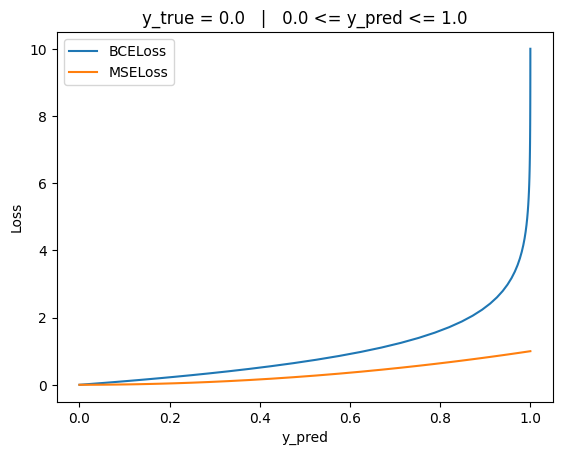

In [3]:
# plot
y_true = torch.zeros(size= (100, 1))
y_pred = torch.sigmoid(torch.linspace(-10, +10, 100).reshape(-1, 1))
bce_loss = BCELoss(reduction= 'none')(y_pred, y_true)
mse_loss = MSELoss(reduction= 'none')(y_pred, y_true)

plt.plot(y_pred, bce_loss, label= 'BCELoss')
plt.plot(y_pred, mse_loss, label= 'MSELoss')
plt.title(f"y_true = {y_true[0, 0]}   |   {y_pred.min().round()} <= y_pred <= {y_pred.max().round()}")
plt.xlabel("y_pred")
plt.ylabel("Loss")
plt.legend()
plt.show()